# Multiclass classification: Repertoire of the mouse lemur

This program test the potential of a deep learning model to:

2) classify mouse lemur vocalizations data according to predifined well-established categories: long and short whistles, trills, tsaks and zips

(This is a multiclass classification problem, supervised learning model)

### Created by Daniel Romero Mujalli, Sep2020

email: danielrm84@gmail.com

last update: 5_Jan_2021

# Step 2: Classifier Network

## Import libraries 

In [1]:
# Libraries or modules
import pandas as pd # to work with data frames as in R
import numpy as np  # to handle vectors and arrays
import matplotlib.pyplot as plt # plotting methods
import tensorflow as tf
print(tf.__version__)

2.4.0


## Preparing data 

In [2]:
# read csv data file
df = pd.read_csv("supervised_repertoire.csv", sep = ";")
df.head()

,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality
0,1,Longwhistle,WAHR,0.841465,3.011553,3.646553,0.6350,23.400952,20.917721,25.767633,4.849912,1.316470,6.881196,1.610591,-58.791936,0.850351
1,2,Longwhistle,WAHR,0.901904,6.764351,7.174351,0.4100,25.209270,22.780746,26.139292,3.358546,0.462675,-2.413272,1.314528,-53.493238,0.851426
2,3,Longwhistle,WAHR,0.852292,10.363701,10.788701,0.4250,17.688605,16.744311,18.238056,1.493744,0.327539,2.302182,1.306135,-56.288520,0.846162
3,4,Longwhistle,WAHR,0.954144,13.798593,14.143793,0.3452,17.998865,15.402811,18.785099,3.382287,0.480829,2.133556,1.023129,-63.095000,0.880977
4,5,Longwhistle,WAHR,0.948745,17.155195,17.520195,0.3650,19.814009,18.115707,20.227881,2.112174,0.495422,-0.555105,1.358357,-53.466793,0.886804


In [3]:
# check the shape of the data
print(df.shape)

(2257, 16)


In [4]:
# extract meaningful columns (input features and output labels)

features = df.iloc[:,7:]
print(features.shape)

(2257, 9)


In [5]:
features.head()

,Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality
0,23.400952,20.917721,25.767633,4.849912,1.316470,6.881196,1.610591,-58.791936,0.850351
1,25.209270,22.780746,26.139292,3.358546,0.462675,-2.413272,1.314528,-53.493238,0.851426
2,17.688605,16.744311,18.238056,1.493744,0.327539,2.302182,1.306135,-56.288520,0.846162
3,17.998865,15.402811,18.785099,3.382287,0.480829,2.133556,1.023129,-63.095000,0.880977
4,19.814009,18.115707,20.227881,2.112174,0.495422,-0.555105,1.358357,-53.466793,0.886804


In [6]:
# feature scaling
# normalization
features = (features - features.mean()) / features.std()
features.head()

,Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality
0,1.827381,1.942991,0.989434,-0.241407,-0.191884,0.356314,-0.219185,0.602682,1.165474
1,2.281215,2.385551,1.045107,-0.470131,-0.749626,0.298987,-0.299209,1.067714,1.174252
2,0.393751,0.951599,-0.138463,-0.756126,-0.837904,0.328071,-0.301478,0.822390,1.131246
3,0.471617,0.632926,-0.056518,-0.466489,-0.737767,0.327031,-0.377973,0.225030,1.415689
4,0.927164,1.277373,0.159604,-0.661280,-0.728234,0.310448,-0.287362,1.070035,1.463293


In [7]:
# extract labels
labels = df.loc[:,"Label"]
print(labels.shape)

(2257,)


In [8]:
labels.describe()

count             2257
unique               5
top       Shortwhistle
freq              1158
Name: Label, dtype: object

In [9]:
# encode the labels
# we use a sklearn preprossesing method: label encoder
# we follow import declare use
# Note that label variable is also called target
from sklearn import preprocessing

# label encoder le
# declare object
le = preprocessing.LabelEncoder() # a label encoder

# use object
label = le.fit(labels)

print("encoder fit", label)

# convert to numerical
labels = le.transform(labels)

target = labels
print(labels)

encoder fit LabelEncoder()
[0 0 0 ... 4 4 4]


In [10]:
# here we use a method from the keras module

#from keras.utils import to_categorical (old, deprecated)
from tensorflow.keras.utils import to_categorical

# to categorical
labels = to_categorical(labels)

# re-convert to dataframe
labels = pd.DataFrame(labels)

labels.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [11]:
#print features and target shape
print(features.shape)

print(labels.shape) # five call types

(2257, 9)
(2257, 5)


## Building the model 

In [12]:
# set model parameters
input_shape = (features.shape[1], ) # as tuple
print(input_shape)

hidden_nodes_1 = 8
hidden_nodes_2 = 5

hidden_activation_1 = "sigmoid"
hidden_activation_2 = "sigmoid"

output_activation = "softmax" # because it is a multiclass problem

loss_function = "binary_crossentropy" # classification problem, not regression

optimizer_used = "rmsprop" # root mean squeare propagation

num_epochs = 200


(9,)


In [13]:
# In order to have a balance data: i.e., same proportion of classes in both, train and test sets
# we import the class StratifiedShuffleSplit from sklearn.model_selection
# Again: import, declare, use
from sklearn.model_selection import StratifiedShuffleSplit

# declare Stratefied... object with 20% data assign to validation (test) set
sss = StratifiedShuffleSplit(n_splits = 1
                            ,test_size = 0.2
                            ,random_state = 0)

# split the data based on the sss object
for train_index, test_index in sss.split(features, labels):
    features_train = features.iloc[train_index, :] # data in features selected for training
    features_test  = features.iloc[test_index,  :] # data in features selected for testing
    labels_train   = labels.iloc  [train_index, :] # data in labels selected for training
    labels_test    = labels.iloc  [test_index,  :] # data in labels selected for testing

# print shapes of train and test data sets. Test data is 20% of original
print("Training features shape: ", features_train.shape)
print("Training labels shape: ", labels_train.shape)
print("Test features shape: ", features_test.shape)
print("Test labels shape: ", labels_test.shape)


Training features shape:  (1805, 9)
Training labels shape:  (1805, 5)
Test features shape:  (452, 9)
Test labels shape:  (452, 5)


In [14]:
# build the neural network model
# we use the sequential method to specify each layer that goes into the model
# here we use keras class: Sequential
from tensorflow.keras.models import Sequential

# we use dense layers (fully connected), also from keras
from tensorflow.keras.layers import Dense

# Model for multiclass classification
model = Sequential()

# hidden layer 1
model.add(Dense(units = hidden_nodes_1
               ,input_shape = input_shape
               ,activation = hidden_activation_1))
# hidden layer 2. No longer needs features shape
model.add(Dense(units = hidden_nodes_2
               , activation = hidden_activation_2))

# output layer: softmax multiclass classification
model.add(Dense(units = labels.shape[1]
                ,activation = output_activation))



In [15]:
# compile the model to build data structure
model.compile(optimizer = optimizer_used
              ,loss = loss_function)

In [16]:
# print model summary to get an idea of the parameters to be trained
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________
None


## Train and test the model 

In [17]:
# fit the model and store history
history = model.fit( x = features_train
                   ,y = labels_train
                   ,epochs = num_epochs
                   ,validation_data = (features_test, labels_test)
                   ,verbose = 1) # 0, silent; 1, training process; 2, epochs only

Epoch 1/200
57/57 [==============================] - 1s 8ms/step - loss: 0.6604 - val_loss: 0.6054
Epoch 2/200
57/57 [==============================] - 0s 3ms/step - loss: 0.5908 - val_loss: 0.5476
Epoch 3/200
57/57 [==============================] - 0s 3ms/step - loss: 0.5344 - val_loss: 0.4996
Epoch 4/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4915 - val_loss: 0.4609
Epoch 5/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4564 - val_loss: 0.4325
Epoch 6/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4227 - val_loss: 0.4134
Epoch 7/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4149 - val_loss: 0.3996
Epoch 8/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3981 - val_loss: 0.3896
Epoch 9/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3850 - val_loss: 0.3812
Epoch 10/200
57/57 [==============================] - 0s 3ms/step - loss: 0.3768 - val_loss: 0.3734
Epoch 11/

57/57 [==============================] - 0s 3ms/step - loss: 0.0784 - val_loss: 0.0932
Epoch 84/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0799 - val_loss: 0.0925
Epoch 85/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0888 - val_loss: 0.0919
Epoch 86/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0810 - val_loss: 0.0913
Epoch 87/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0826 - val_loss: 0.0908
Epoch 88/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0803 - val_loss: 0.0901
Epoch 89/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0736 - val_loss: 0.0894
Epoch 90/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0781 - val_loss: 0.0888
Epoch 91/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0703 - val_loss: 0.0883
Epoch 92/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0819 - val_loss: 0.0879
Epoch 93/200


57/57 [==============================] - 0s 3ms/step - loss: 0.0592 - val_loss: 0.0652
Epoch 165/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0477 - val_loss: 0.0649
Epoch 166/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0567 - val_loss: 0.0647
Epoch 167/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0470 - val_loss: 0.0645
Epoch 168/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0452 - val_loss: 0.0643
Epoch 169/200
57/57 [==============================] - 0s 2ms/step - loss: 0.0442 - val_loss: 0.0641
Epoch 170/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 0.0637
Epoch 171/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.0634
Epoch 172/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0566 - val_loss: 0.0633
Epoch 173/200
57/57 [==============================] - 0s 3ms/step - loss: 0.0545 - val_loss: 0.0631
Epoc

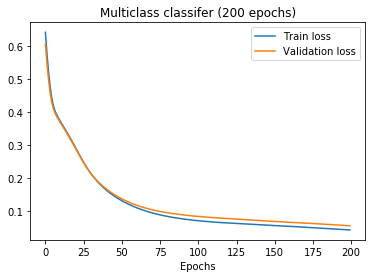

In [18]:
# custom fuction to plot history dictionary
def plot_loss_history(h, title):
    plt.plot(h.history["loss"], label = "Train loss")
    plt.plot(h.history["val_loss"], label = "Validation loss")
    plt.xlabel("Epochs")
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_history(history, "Multiclass classifer ({} epochs)".format(num_epochs))

In [20]:
# confusion matrix
# using sklearn metrics
from sklearn.metrics import confusion_matrix

predictions = model.predict(features_test)
#print(predictions)

#predicted_classes = model.predict_classes(features_test) # deprecated
predicted_classes = np.argmax(model.predict(features_test), axis = -1)
predicted_classes = predicted_classes.reshape(len(predicted_classes),1)

#print(labels)
target = pd.DataFrame(target)
#print(target)
target_classes = target.iloc[test_index].to_numpy()

#print(predicted_classes)
con_mat_df = confusion_matrix(target_classes, predicted_classes, labels = [0, 1, 2, 3, 4])
print("\nConfusion matrix")
print(con_mat_df)


Confusion matrix
[[ 33   4   0   0   0]
 [  0 228   0   4   0]
 [  2   0  58   1   0]
 [  0   1   1 106   0]
 [  4   0   0   0  10]]


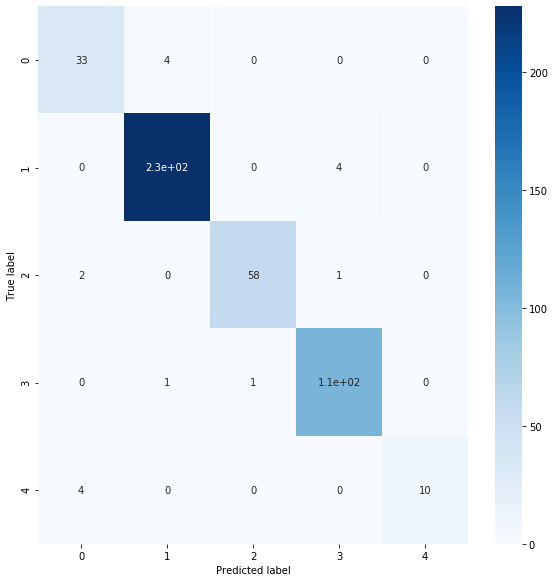

In [21]:
import seaborn as sn

figure = plt.figure(figsize = (8, 8))
sn.heatmap(con_mat_df, annot = True, cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [27]:
print(target[0].unique())

[0 1 2 3 4]


In [28]:
# decoding the target labels:
calltype = le.inverse_transform(target.to_numpy())
calltype = pd.DataFrame(calltype)
print(calltype[0].unique())

['Longwhistle' 'Shortwhistle' 'Trill' 'Tsak' 'Zip']


In [33]:
# Report the metrics to assess performance using metrics from the sklearn module

from sklearn import metrics

print(metrics.classification_report(target_classes, predicted_classes, target_names = calltype[0].unique()))

              precision    recall  f1-score   support

 Longwhistle       0.85      0.89      0.87        37
Shortwhistle       0.98      0.98      0.98       232
       Trill       0.98      0.95      0.97        61
        Tsak       0.95      0.98      0.97       108
         Zip       1.00      0.71      0.83        14

    accuracy                           0.96       452
   macro avg       0.95      0.90      0.92       452
weighted avg       0.96      0.96      0.96       452

